In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv('D:\DataSets\diabetes.csv')

In [5]:
cols=list(df.columns)
cols

['preg',
 'glucose',
 'bp_diastolic',
 'skin_triceps',
 'insulin',
 'bmi',
 'pedigree',
 'age',
 'label']

In [6]:
df.head()

,preg,glucose,bp_diastolic,skin_triceps,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.tail()

,preg,glucose,bp_diastolic,skin_triceps,insulin,bmi,pedigree,age,label
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [8]:
#x=train,y_test,x_test,y_train
#where 
# x is feature_column and y is label

In [68]:
#features_cols=cols['glucose','bmi','age']
#print(features_cols)

features_cols=['glucose','bmi', 'pedigree','age']
print(features_cols)

['glucose', 'bmi', 'pedigree', 'age']


In [69]:
#data frme
X=df[features_cols] # Features 
#series
y=df.label         # Target variable
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=30)

In [70]:
# get total numbers of 0 in the actual dataset
count0 = df['label'][df['label']==0].count()
count0

500

In [71]:
#data frame
X_train.shape

(537, 4)

In [72]:
len(y_train)

537

In [73]:
y_train

739    1
559    0
651    0
368    0
191    0
      ..
145    0
763    0
140    0
500    0
421    0
Name: label, Length: 537, dtype: int64

In [74]:
len(y_train[y_train==0])

341

In [75]:
X_test.shape

(231, 4)

In [76]:
len(y_test)

231

In [77]:
len(y_test[y_test==0])

159

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
#create dEcision Tree classifer object
clf=DecisionTreeClassifier(criterion="entropy",max_depth=3)

In [80]:
#Train classifer 
clf=clf.fit(X_train,y_train)

In [81]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [82]:
#predict the response for test dataset
y_pred=clf.predict(X_test)

In [83]:
len(y_pred)

231

[Text(334.8, 570.7800000000001, 'X[0] <= 127.5\nentropy = 0.947\nsamples = 537\nvalue = [341, 196]'),
 Text(167.4, 407.70000000000005, 'X[3] <= 28.5\nentropy = 0.749\nsamples = 341\nvalue = [268, 73]'),
 Text(83.7, 244.62, 'X[1] <= 30.9\nentropy = 0.428\nsamples = 183\nvalue = [167, 16]'),
 Text(41.85, 81.53999999999996, 'entropy = 0.079\nsamples = 103\nvalue = [102, 1]'),
 Text(125.55000000000001, 81.53999999999996, 'entropy = 0.696\nsamples = 80\nvalue = [65, 15]'),
 Text(251.10000000000002, 244.62, 'X[1] <= 26.25\nentropy = 0.943\nsamples = 158\nvalue = [101, 57]'),
 Text(209.25, 81.53999999999996, 'entropy = 0.337\nsamples = 32\nvalue = [30, 2]'),
 Text(292.95, 81.53999999999996, 'entropy = 0.988\nsamples = 126\nvalue = [71, 55]'),
 Text(502.20000000000005, 407.70000000000005, 'X[0] <= 154.5\nentropy = 0.953\nsamples = 196\nvalue = [73, 123]'),
 Text(418.5, 244.62, 'X[1] <= 34.05\nentropy = 1.0\nsamples = 110\nvalue = [56, 54]'),
 Text(376.65000000000003, 81.53999999999996, 'entrop

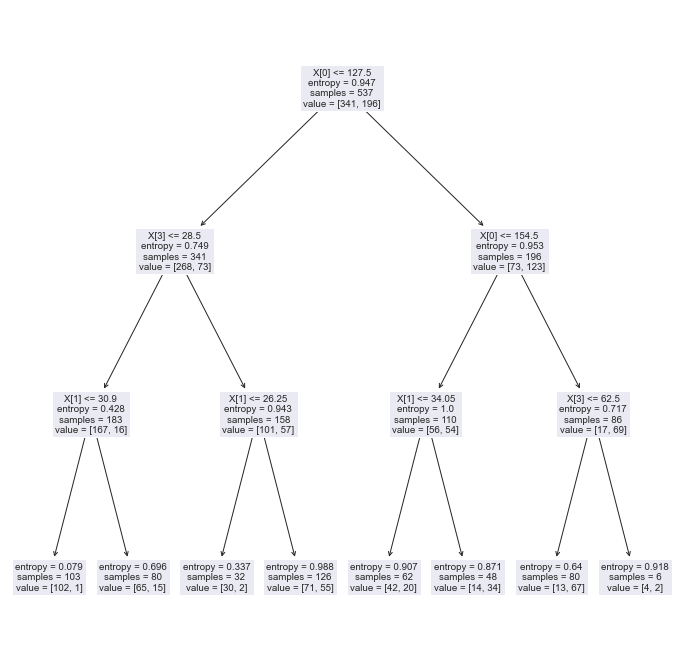

In [84]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(12,12))
tree.plot_tree(clf)

In [85]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 127.50
|   |--- feature_3 <= 28.50
|   |   |--- feature_1 <= 30.90
|   |   |   |--- class: 0
|   |   |--- feature_1 >  30.90
|   |   |   |--- class: 0
|   |--- feature_3 >  28.50
|   |   |--- feature_1 <= 26.25
|   |   |   |--- class: 0
|   |   |--- feature_1 >  26.25
|   |   |   |--- class: 0
|--- feature_0 >  127.50
|   |--- feature_0 <= 154.50
|   |   |--- feature_1 <= 34.05
|   |   |   |--- class: 0
|   |   |--- feature_1 >  34.05
|   |   |   |--- class: 1
|   |--- feature_0 >  154.50
|   |   |--- feature_3 <= 62.50
|   |   |   |--- class: 1
|   |   |--- feature_3 >  62.50
|   |   |   |--- class: 0



# Evaluating a Classification Model

Basic Terminology

True Positives (TP): We correctly predicated that they do have diaetes

True Positives (TN): We correctly predicated that they don't have diaetes

False Positives (FP): We incorrectly predicated that they do have diaetes (a"Type i error")

False Positives (FN): We incorrectly predicated that they don't have diaetes (a"Type i error")

In [86]:
#calculate accuracy
from sklearn import metrics

In [87]:
result=metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(result)

Confusion Matrix
[[141  18]
 [ 32  40]]


In [88]:
def plt1():
    import seaborn as sns;sns.set()
    c_mtrx=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['predicted'])
    sns.heatmap(c_mtrx,annot=True,fmt = '.3g')

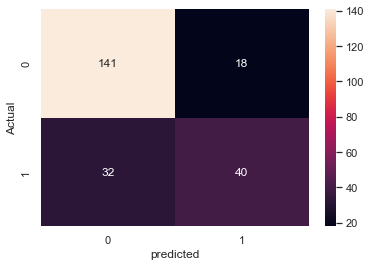

In [89]:
plt1()

In [61]:
#[Row, Column]
# [Actual,Predict]
TP = result[1, 1]   
TN = result[0, 0]
FP = result[0, 1]
FN = result[1, 0]

# Metrics computed from a confusio matrix

Classification Accuracy :Overall , how often is the classifer correct (TP+TN)/(TP+TN+FP+FN)

Classification Error (Misclassification Rate): Overall how often is the classifier incorrect (FP+FN)/(TP+TN +FP+FN)

Classification Error =1 Classification Accuracy

Sensititity (Recall ):When the actual value is positive ,how often is the prediction correct ? TP / (FN+TP)# (Row Wise)

Specificity: When the actual Value is negative how often is the prediction correct ? TN/(TN+FP)# (Row Wise)

Precision When a positve value is predicated how often is the prediction correct ? TP (TP+FP) # Column wise



false Positive rate: when the actual value is nagative how often is the prediction incorrect ? FP/ (TN+FP)  # Column wise

In [90]:
def EvClsMdl(res):
    print('Metrics computed from a confusion matrix')
    print("Accuracy:\t", metrics.accuracy_score(y_test, y_pred))
    print("Sensitivity:\t", metrics.recall_score(y_test, y_pred))
    print("Specificity:\t",TN / (TN + FP))
    print("Precision:\t", metrics.precision_score(y_test, y_pred))
    print("Classification Eerror:", 1 - metrics.accuracy_score(y_test, y_pred))
    print("False_Positive_Rate:", 1 - TN / (TN + FP))

In [91]:
EvClsMdl(result)

Metrics computed from a confusion matrix
Accuracy:	 0.7835497835497836
Sensitivity:	 0.5555555555555556
Specificity:	 0.8867924528301887
Precision:	 0.6896551724137931
Classification Eerror: 0.21645021645021645
False_Positive_Rate: 0.1132075471698113


In [92]:
#Metrics computed from a confusio matrix

# Regression Accucy matix

In [93]:
y= pd.DataFrame({'Original':y_test,'Predicated':y_pred})
y.head()

,Original,Predicated
226,0,0
610,0,0
505,0,0
470,0,1
474,0,0


In [94]:
y.tail()

,Original,Predicated
499,0,0
582,0,0
273,0,0
330,0,0
522,0,0


In [95]:
y.sample(10)

,Original,Predicated
47,0,0
285,0,0
400,1,0
290,0,0
638,1,0
413,0,0
424,1,1
135,0,0
301,1,0
236,1,1
